# Lorenz Equations
## October 20th, 2022
### Overview: Solving, plotting, animating Lorenz equations

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation as FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import linregress

In [3]:
%matplotlib notebook

## Problem 1
Write a function that implements the Lorenz equations. Let $\sigma = 10$, $\rho = 28$, $\beta = 8$ . Make a 3D plot of a solution to the Lorenz equations for an initial condition where $(x, y, z)$ are drawn randomly from a uniform distribution from −15 to 15. As usual, use `scipy.integrate.solve_ivp` to compute the solution.

In [4]:
def lorenz(t, x):
    """Implements Lorenz equations:
    
    dx/dt = σ(y − x)
    dy/dt = ρx − y − xz
    dz/dt = xy − βz
        
    Parameters:
        t (float): The time value t
        x ((3,) ndarray): The state values (x,y,z)
    Returns:
        ((3,) ndarray): The derivative values
    """
    #Lorenz derivs
    dx = 10*(x[1] - x[0])
    dy = 28*x[0] - x[1] - x[0]*x[2]
    dz = x[0]*x[1] - (8/3)*x[2]
    
    return np.array([dx,dy,dz])

<IPython.core.display.Javascript object>


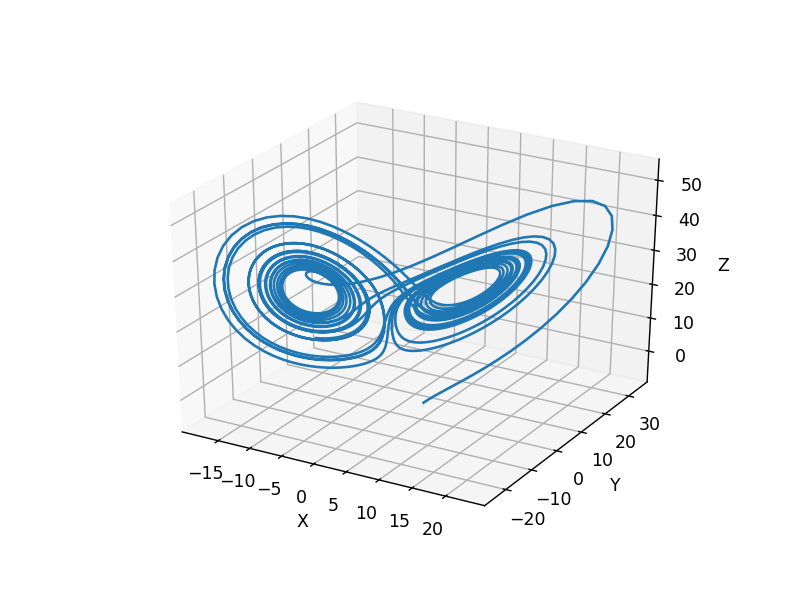

In [5]:
#uniform random initial condition
x0 = np.random.uniform(-15,15,3)
t_span = (0,25)

#get solution
sol = solve_ivp(lorenz,t_span,x0,max_step=0.01)

#plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(sol.y[0],sol.y[1],sol.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Problem 2
To better visualize the Lorenz attractor, produce a single 3D plot displaying three solutions to the Lorenz equations, each with random initial conditions.

<IPython.core.display.Javascript object>


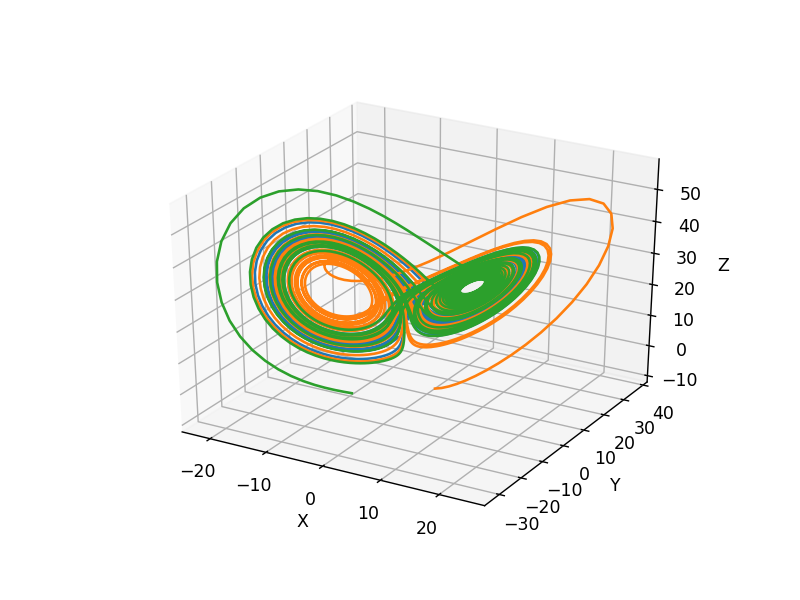

In [6]:
#uniform random initial conditions
x1 = np.random.uniform(-15,15,3)
x2 = np.random.uniform(-15,15,3)
x3 = np.random.uniform(-15,15,3)
t_span = (0,25)

#get solutions
sol1 = solve_ivp(lorenz,t_span,x1,max_step=0.01)
sol2 = solve_ivp(lorenz,t_span,x2,max_step=0.01)
sol3 = solve_ivp(lorenz,t_span,x3,max_step=0.01)

#plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(sol1.y[0],sol1.y[1],sol1.y[2])
ax.plot(sol2.y[0],sol2.y[1],sol2.y[2])
ax.plot(sol3.y[0],sol3.y[1],sol3.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## Problem 3
Use `matplotlib.animation.FuncAnimation` to produce a 3D animation of two solutions to the Lorenz equations with similar initial conditions. To make similar initial conditions, draw $(x_1,y_1,z_1)$ randomly as before, and then produce $(x_2,y_2,z_2)$ by adding a small perturbation: `np.random.randn(3)*(1e-10)`. It will take several seconds before the separation between the two solutions will be noticeable.

The animation should have a point marker and the past trajectory curve for each solution. Save your animation as `lorenz_animation1.mp4`.

(Recall that you can display the saved animation in a Jupyter notebook by running the follwing code in a markdown cell):

`<video src='lorenz_animation1.mp4' controls>`

In [14]:
#inital condition
x1 = np.random.uniform(-15,15,3)
x2 = x1+np.random.randn(3)*(1e-3)
t_span = (0,25)
sol1 = solve_ivp(lorenz,t_span,x1,max_step=0.01)
sol2 = solve_ivp(lorenz,t_span,x2,max_step=0.01)
plt.ioff()


# Initialize the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-30, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((-10, 50))

#create each particle and trajectory for each planet
particle_sol1, = plt.plot([],[],[], marker='o',c='r')
traj_sol1, = plt.plot([],[],[], alpha=0.5,c='r')
particle_sol2, = plt.plot([],[],[], marker='o',c='b')
traj_sol2, = plt.plot([],[],[], alpha=0.5,c='b')

# Make an update function
def update(i):
    #solution1
    particle_sol1.set_data(sol1.y[0,i],sol1.y[1,i])
    particle_sol1.set_3d_properties(sol1.y[2,i])
    traj_sol1.set_data(sol1.y[0,:i+1],sol1.y[1,:i+1])
    traj_sol1.set_3d_properties(sol1.y[2,:i+1])
    
    # sol2
    particle_sol2.set_data(sol2.y[0,i], sol2.y[1,i])
    particle_sol2.set_3d_properties(sol2.y[2,i])
    traj_sol2.set_data(sol2.y[0,:i+1], sol2.y[1,:i+1])
    traj_sol2.set_3d_properties(sol2.y[2,:i+1])
    return [particle_sol1, traj_sol1], [particle_sol2, traj_sol2]

# Include a legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Lorenz Solution with a Pertubation')

# Run the Function Animation Object
plt.ioff()
anim = animation.FuncAnimation(fig, update, frames = range(len(sol1.y[0])), interval = 10)
animation.writer = animation.writers['ffmpeg']

# Save the animation
anim.save('lorenz_animation1.mp4')

<video src='lorenz_animation1.mp4' controls>

## Problem 4
The `solve_ivp` function allows users to specify error tolerances (similar to setting a value of $h$ for a Runge-Kutta method). Using a single random initial condition, produce two approximations by using the `solve_ivp` arguments `(atol=1e-15, rtol=1e-13)` for the first approximation and `(atol=1e-12, rtol=1e-10)` for the second.
As in the previous problem, use `FuncAnimation` to animate both solutions. Save the animation as `lorenz_animation2.mp4`.

In [23]:
#get init cond and solutions with different error tolerances
x1 = np.random.uniform(-15,15,3)
t_span = (0,50)
sol1 = solve_ivp(lorenz,t_span,x1,t_eval=np.linspace(0,50,3000),atol=1e-15,rtol=1e-13)
sol2 = solve_ivp(lorenz,t_span,x1,t_eval=np.linspace(0,50,3000),atol=1e-12,rtol=1e-10)
plt.ioff()

# Initialize the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-30, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((-10, 50))

#create each particle and trajectory for each planet
particle_sol1, = plt.plot([],[],[], marker='o',c='r')
traj_sol1, = plt.plot([],[],[], alpha=0.5,c='r')
particle_sol2, = plt.plot([],[],[], marker='o',c='b')
traj_sol2, = plt.plot([],[],[], alpha=0.5,c='b')

# Make an update function
def update(i):
    particle_sol1.set_data(sol1.y[0,i],sol1.y[1,i])
    particle_sol1.set_3d_properties(sol1.y[2,i])
    traj_sol1.set_data(sol1.y[0,:i+1],sol1.y[1,:i+1])
    traj_sol1.set_3d_properties(sol1.y[2,:i+1])
    
    # sol2
    particle_sol2.set_data(sol2.y[0,i], sol2.y[1,i])
    particle_sol2.set_3d_properties(sol2.y[2,i])
    traj_sol2.set_data(sol2.y[0,:i+1], sol2.y[1,:i+1])
    traj_sol2.set_3d_properties(sol2.y[2,:i+1])
    return [particle_sol1, traj_sol1], [particle_sol2, traj_sol2]

# Include a legend
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Lorenz Solution with a Pertubation')

# Run the Function Animation Object
plt.ioff()
anim = animation.FuncAnimation(fig, update, frames = range(len(sol1.y[0])), interval = 10)
animation.writer = animation.writers['ffmpeg']

# Save the animation
anim.save('lorenz_animation2.mp4')

<video src='lorenz_animation1.mp4' controls>

## Problem 5
Estimate the Lyapunov exponent of the Lorenz equations by doing the following:
* Produce an initial condition that already lies on the attractor. This can be done by using a random "dummy" initial condition, approximating the resulting solution to the Lorenz system for a short time, and then using the endpoint of that solution (which is now on the attractor) as the desired intital condition.
* Produce a second initial condition by adding a small perturbation to the first (as before).
* For both initial conditions, use `solve_ivp` to produce approximate solutions for $0 \leq t \leq 10$.
* Compute $||\delta(t)||$ by taking the norm of the vector difference between the two solutions for each value of $t$.
* Use `scipy.stats.linregress` to calculate a best-fit line for $\log(||\delta(t)||)$ against $t$.
* The slope of the resulting best-fit line is an approximation of the Lyapunov exponent $\lambda$.

Produce a plot similar to Figure 1.3 using `plt.semilogy`.

Hint: Remember that the best-fit line you calculated corresponds to a best-fit exponential for $||\delta(t)||$. If `a` and `b` are the slope and intercept of the best-fit line, the best-fit exponential can be plotted using `plt.semilogy(t,np.exp(a*t+b))`.

In [37]:
#producing initial condition within attractor
x0 = solve_ivp(lorenz,(0,5),np.random.uniform(-15,15,3),max_step=0.1).y[:,-1]
#perturbing slightly
x1 = x0 + np.random.randn(3)*(1e-5)

#time span, make solutions
t_span = (0,10)
sol1 = solve_ivp(lorenz,t_span,x0,max_step=0.01)
sol2 = solve_ivp(lorenz,t_span,x1,max_step=0.01)

#get norms of differences between the solutions
delta_norm = [np.linalg.norm(y) for y in sol1.y.T - sol2.y.T]

#define time space and do linear regression
T = np.linspace(0,10,1002)
linreg = linregress(T,np.log(delta_norm))
a,b = linreg.slope, linreg.intercept

<IPython.core.display.Javascript object>


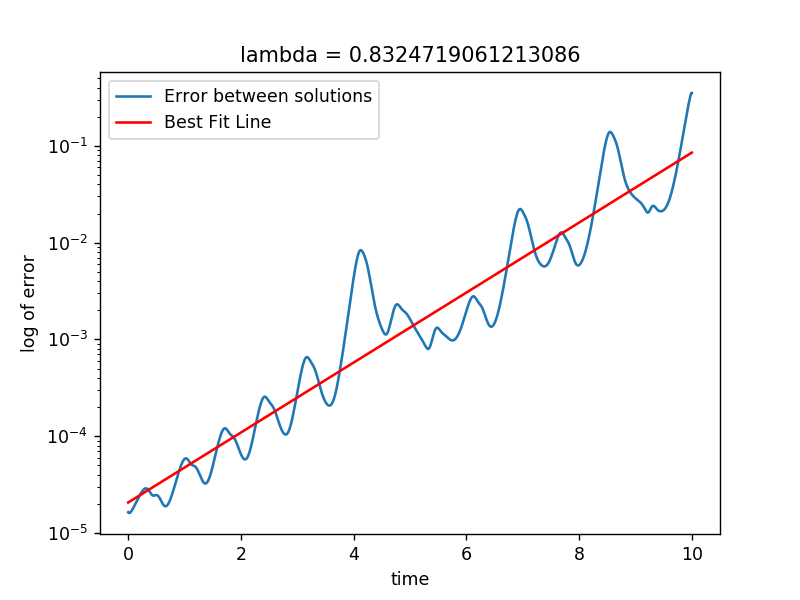

In [45]:
#plotting our stuff
fig = plt.figure()
ax = plt.axes()
plt.semilogy(T,delta_norm,label='Error between solutions')
plt.semilogy(T,np.exp(a*T + b),label='Best Fit Line',c='r')
plt.legend()
plt.title('lambda = '+str(a))
plt.xlabel('time')
plt.ylabel('log of error')
plt.show()